Notebook to experiment with showing the Pareto front in control parameter space. We start by initialising a simple two-objective `Optimizer`, feed it some points, and plot its Pareto front:

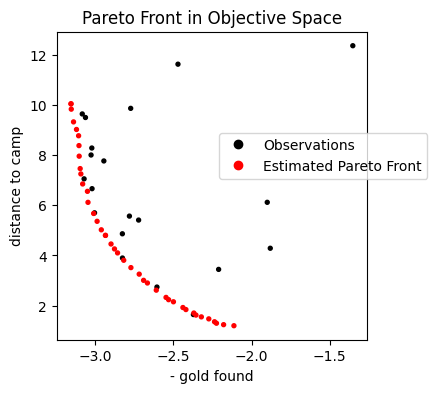

In [1]:
import ProcessOptimizer as po
from ProcessOptimizer.model_systems import get_model_system
from ProcessOptimizer import Optimizer

# Define the model system
gold_model_system = get_model_system("gold_map")
distance_model_system = get_model_system("distance_map")

space = distance_model_system.space

opt = Optimizer(space, n_initial_points=4, n_objectives=2)

for i in range(20):
    new_dig_site = opt.ask()
    gold_found = gold_model_system.get_score(new_dig_site)
    distance = distance_model_system.get_score(new_dig_site)
    result_list = opt.tell(new_dig_site, [gold_found, distance])

po.plot_Pareto(optimizer=opt, figsize = [4,4], objective_names=["- gold found", "distance to camp"], return_data=True);



We can plot the Pareto front in the process parameter space. That is, on top of landscapes
of the surrogate function when we vary two process parameters, we can plot the points that
correspond to the Pareto front. We can do this with varting colors, so we can tell which
are the same points in different 2D plots. This isn't really needed here, since we only
have two process parameters. We need an example with more than two process parameters to
really show how it would work.

[array([[<Axes: xlabel='E-W', ylabel='Dependence'>, <Axes: >],
        [<Axes: xlabel='E-W', ylabel='N-S'>,
         <Axes: xlabel='N-S', ylabel='Dependence'>]], dtype=object),
 array([[<Axes: xlabel='E-W', ylabel='Dependence'>, <Axes: >],
        [<Axes: xlabel='E-W', ylabel='N-S'>,
         <Axes: xlabel='N-S', ylabel='Dependence'>]], dtype=object)]

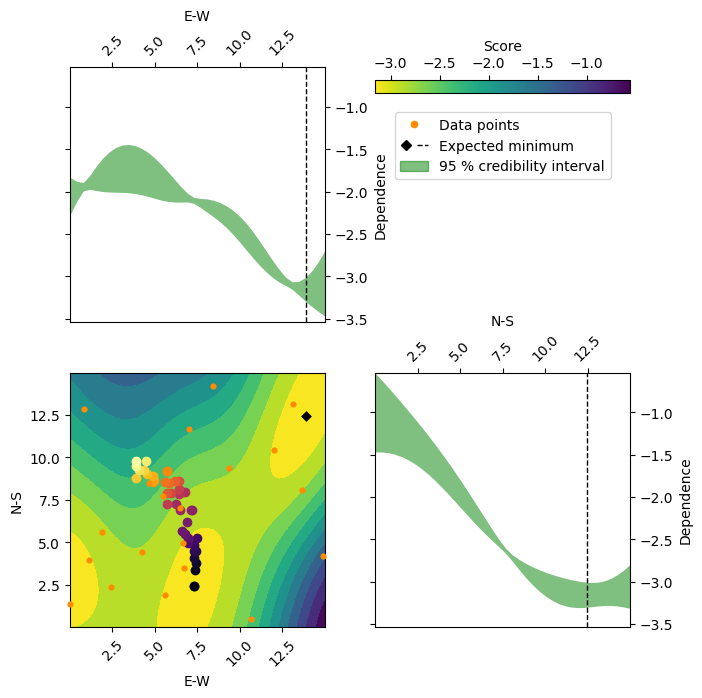

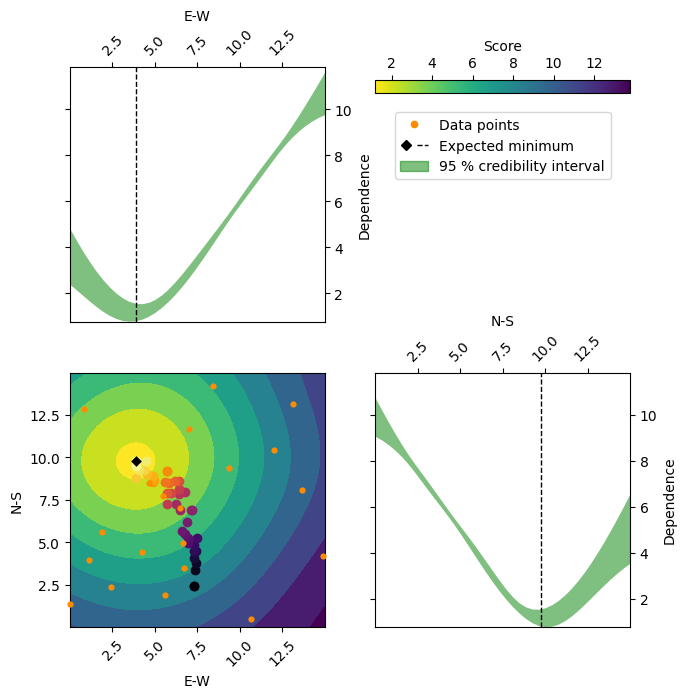

In [9]:
from typing import Union
import numpy as np
import matplotlib
def plot_pareto_in_space(
        result_list,
        opt,
        colormap="inferno",
        pars: Union[None, str]=None,
        dimensions : Union[None, list[str]] = None
):
    colormap = matplotlib.colormaps[colormap]
    figure_list = []
    pop, _, front = opt.NSGAII()
    pop = np.asarray(pop)
    pop = np.asarray(
        opt.space.inverse_transform(
            pop.reshape(len(pop), opt.space.transformed_n_dims)
        )
    )
    order = front.argsort(axis=0) # Sorting according to the objectives
    pop = pop[order[:, 0]] # Sorting according to the first objective
    colors = np.linspace(0, 1, len(pop))
    colors = [colormap(c) for c in colors]
    for result in result_list:
        plot = po.plot_objective(
            result=result,
            pars=pars,
            dimensions=dimensions,
        )
        for i in range(1, len(opt.space)): # Vertical plot number
            for j in range(0, i): # Horizontal plot number
                for point, color in zip(pop,colors):
                    plot[i][j].scatter(x=[point[j]], y=[point[i]], color=[color])
        figure_list.append(plot)
    return figure_list
plot_pareto_in_space(result_list, opt, pars="expected_minimum", dimensions=["E-W", "N-S"])
